# Broadcast Capacity Regions for TDMA, FDMA, and NOMA

Python script for illustrating capacity regions for BC and TDMA and FDMA
and superposition coding with successive cancellation for the 2-user case. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------------------------------------------
# parameter definitions
# ---------------------------------------------------------------------------------------------------------------------

# channel SNRs
SNR1dB = 10
SNR2dB = 7

SNR1 = 10.0**(SNR1dB/10.0)
SNR2 = 10.0**(SNR2dB/10.0)

# power split parameter
alpha = np.arange(0.001, 0.999, 0.001)

# time / bandwidth split parameter
tau_TD = np.arange(0.001, 0.999, 0.001)
tau_FD = np.arange(0.05, 0.95, 0.05)

Tau, Alpha = np.meshgrid(tau_FD, alpha)

Individual link capacities for two users for AWGN channels with Gaussian inputs are

\begin{align*}
    C_1 &= \log_2(1 + \mathsf{SNR}_1) \\
    C_2 &= \log_2(1 + \mathsf{SNR}_2) \; .
\end{align*}

The individual SNR values include the channel gains $|h_i|^2$ and the total transmit power $\alpha_{\max}^2$ of the base station and are defined as SNR$_i=\frac{|h_i|^2 \alpha_{\max}^2}{N_{0,i} B} = \alpha_{\max}^2 \cdot \mathrm{CNR}_i$ with the 'channel to noise ratio' $\mathrm{CNR}_i = \frac{|h_i|^2}{N_{0,i} B}$.

In [2]:
# channel capacities for individual channels
C1 = np.log2(1+SNR1)
C2 = np.log2(1+SNR2)

## Time Division Multiple Access (TDMA)

For TDMA (time sharing), the user signals are strictly separated in time. User 1 gets the portion $\tau$, $0 \leq \tau \leq 1$, of the total available time and user 2 gets the remaining portion $1-\tau$ correspondingly. The achievable rate tuples become

\begin{align*}
    C_1^{(\mathsf{TD})} &= \tau \cdot \log_2(1 + \mathsf{SNR}_1) = \tau \cdot \log_2(1 + \alpha_{\max}^2 \cdot \mathsf{CNR}_1) \\
    C_2^{(\mathsf{TD})} &= (1-\tau) \cdot \log_2(1 + \mathsf{SNR}_2) = (1-\tau) \cdot \log_2(1 + \cdot \alpha_{\max}^2 \mathsf{CNR}_2)
\end{align*}

In [3]:
# capacities for TDMA (time sharing)
Corth1_TD = tau_TD * np.log2(1+SNR1)
Corth2_TD = (1-tau_TD) * np.log2(1+SNR2)

## Frequency Division Multiple Access (FDMA)

For FDMA (frequency sharing), the user signals are strictly separated in frequency. User 1 gets the portion $\tau$, $0 \leq \tau \leq 1$, of the total available bandwidth and user 2 gets the remaining portion $1-\tau$ correspondingly. As the allocated bandwidth per user influences the effective noise power, the corresponding SNRs depend on the bandwidth share if the individual powers $\alpha_1^2$ and $\alpha_2^2$ are kept fixed. Moreover, the broadcast case is characterized by a sum power constraint, i.e. the base station can split its power $\alpha_{\max}^2=\alpha_1^2+\alpha_2^2$ onto the two user signals. With $\alpha_1^2$ and $\alpha_2^2=\alpha_{\max}^2-\alpha_1^2$, the achievable rate tuples become

\begin{align*}
    C_1^{(\mathsf{FD})} &= \tau \cdot \log_2 \left(1 + \alpha_1^2 \cdot \frac{\mathsf{CNR}_1}{\tau} \right) \\
    C_2^{(\mathsf{FD})} &= (1-\tau) \cdot \log_2 \left(1 + (\alpha_{\max}^2-\alpha_1^2) \cdot \frac{\mathsf{CNR}_2}{1-\tau} \right) \; .
\end{align*}

Obviously, TDMA and FDMA yield the same result for $\tau = \frac{\alpha_1^2}{\alpha_{\max}^2}$, i.e. bandwidth and power splits are identical. In this case, the user-specific SNR 

\begin{equation*}
    \frac{\alpha_1^2}{\tau BN_0} = \frac{\alpha_{\max}^2-\alpha_1^2}{(1-\tau)BN_0}
    = \frac {\alpha_{\max}^2}{BN_0} = \frac {E_{\mathrm{s}}B}{BN_0} = \frac {E_{\mathrm{s}}}{N_0}
\end{equation*}

becomes independent of $\tau$ and $\alpha_1^2$ and the energy per symbol $E_{\mathrm{s}}$ remains constant.

In [4]:
# capacities for FDMA (frequency sharing)
Corth1_FD = Tau  * np.log2( 1 + Alpha*SNR1/Tau )
Corth2_FD = (1-Tau) * np.log2( 1 + (1-Alpha)*SNR2/(1-Tau) )

## Superposition Coding and Successive Decoding

Superposition coding with successive decoding represents a non-orthogonal multiple access (NOMA) scheme. Here, the user signals interfere with each other. Assuming different SNRs on the channels, users have to use different rates. However, the effective SNR depends on the power split $\alpha_k^2$ at the base station. For the 2-user case and including the power split by parameter $\alpha_1^2$, they become 

* SNR$_1 = \alpha_1^2 \cdot \mathrm{CNR}_1 = \alpha_1^2 \frac{|h_1|^2}{N_{0,1} B}$ 
* SNR$_2 = (\alpha_{\max}^2-\alpha_1^2) \cdot \mathrm{CNR}_2 = (\alpha_{\max}^2-\alpha_1^2) \frac{|h_2|^2}{N_{0,2} B}$.

For the sequel, we assume that the SNRs are ordered, i.e. SNR$_1 >$ SNR$_2$ holds.

At each user terminal $k$, the desired signal $x_k$ has to be decoded. Be aware that all terminals receive the same information bearing signal $\sum_k \alpha_k^2 x_k$, but experience different channel SNRs. This is very important for understanding the following detection principle.


### Optimal Detection Order

Considering terminal 2 with the smaller SNR, it will not be able to decode the signal $x_1$ as this is encoded for a higher SNR and the rate $R_1$ will exceed the link capacity $C_2$ of user 2. Therefore, terminal 2 suffers from noise and the interference of $x_1$ and has a capacity

\begin{align*}
    C_2^{(\mathsf{NOMA})} &= \log_2 \left(1 + (\alpha_{\max}^2-\alpha_1^2) \cdot \frac{\mathsf{CNR}_2}{1+\alpha_1^2 \cdot \mathsf{CNR}_2} \right) \ .
\end{align*}

Contrarily, user 1 with the highest SNR will be able to decode the signal $x_2$ because this is encoded for a channel with a lower SNR and $R_2 < C_1$ holds. The optimal detection order for terminal 1 is to start detecting the interfering signal $x_2$ of the weaker user and subtract it from the received signal $y_1$. Afterwards, only the desired signal $x_1$ and noise remain and the detection its own signal $x_1$ can be performed. Hence, this signal can be transmitted at the highest possible rate

\begin{align*}
    C_1^{(\mathsf{NOMA})} &= \log_2 \left(1 + \alpha_1^2 \cdot \mathsf{CNR}_1 \right) \\
\end{align*}

This successive detection strategy can be easily extended to the $K$-user scenario. The weakest user suffer from interference of all other $K-1$ users. The weakest but one user can detect and cancel signal $x_K$ of the weakest user and suffers afterwards from $K-2$ users only. In this way, every stronger user can detect and cancel one more signal. The strongest user is able to successively detect and cancel all $K-1$ weaker signals and experiences afterwards no interference at all.



### Opposite Detection Order

Now, the question arises how much we lose if the opposite detection order leads to a much lower rate tuple. We will anser this question for the 2-user case. If the weaker user 2 shall be able to detect and subtract $x_1$ before decoding its own signal $x_2$, the rate $R_1$ has to be reduced such that the condition

\begin{align*}
    R_1 &\leq \log_2 \left(1 + \frac{\alpha_1^2 \cdot \mathsf{CNR}_2}{(\alpha_{\max}^2-\alpha_1^2) \cdot \mathsf{CNR}_2 + 1} \right) 
    < \log_2 \left(1 + \frac{\alpha_1^2 \cdot \mathsf{CNR}_1}{(1-\alpha_1^2) \cdot \mathsf{CNR}_1 
    + 1} \right) 
\end{align*}

holds. In this case, terminal 2 can cancel $x_1$ and $x_2$ can be transmitted at rate

\begin{align*}
    C_2^{(\mathsf{NOMA})} &= \log_2 \left(1 + (\alpha_{\max}^2-\alpha_1^2) \cdot \mathsf{CNR}_2 \right) \ .
\end{align*}

Even though terminal 1 has the stronger channel, its rate $R_1$ is limited by the above expression such that it cannot benefit from better channel coditions. There is no way that canceling $x_2$ at terminal one increases the achievable rate because the limiting factor is the above constraint. This is the reason why significant losses occur with the wrong detection order.

In [5]:
# capacities for NOMA and optimal detection orders
C1_SC_opt = np.log2(1 + alpha * SNR1)
C2_SC_opt = np.log2(1 + ((1 - alpha) * SNR2) / (1 + alpha * SNR2))


# capacities for NOMA and bad detection orders
C1_SC_bad1 = np.log2(1 + (alpha * SNR1) / (1 + (1 - alpha) * SNR1)) # just for illustration
C1_SC_bad2 = np.log2(1 + (alpha * SNR2) / (1 + (1 - alpha) * SNR2))
C2_SC_bad = np.log2(1 + (1 - alpha) * SNR2)


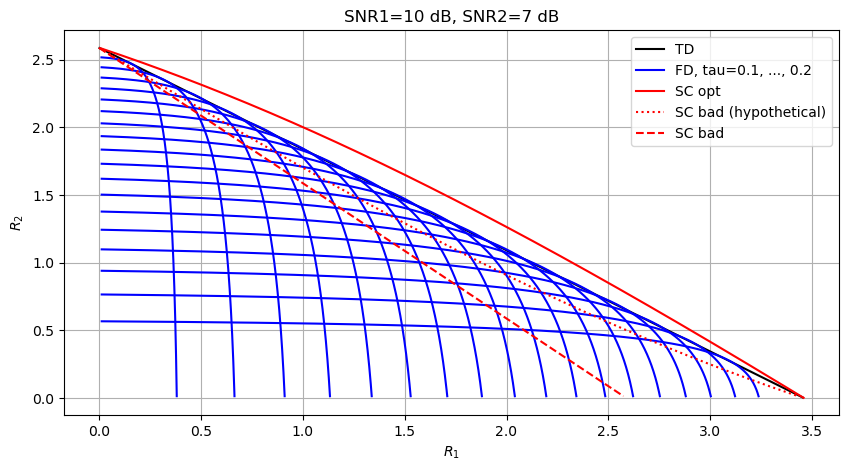

In [6]:
# ---------------------------------------------------------------------------------------------------------------------
# plotting results
# ---------------------------------------------------------------------------------------------------------------------

fig_BC = plt.figure(figsize=(10,5))
ax = fig_BC.add_subplot(111)
ax.plot(Corth1_TD,Corth2_TD,'k-',label='TD')
ax.plot(Corth1_FD[:, 0], Corth2_FD[:, 0], 'b-', label='FD, tau=%.1f, ..., %.1f' % (tau_FD[0],tau_FD[3]))
for run in range(1, tau_FD.size):
    ax.plot(Corth1_FD[:,run], Corth2_FD[:,run], 'b-')
ax.plot(C1_SC_opt,C2_SC_opt,'r-',label='SC opt')
ax.plot(C1_SC_bad1,C2_SC_bad,'r:',label='SC bad (hypothetical)')
ax.plot(C1_SC_bad2,C2_SC_bad,'r--',label='SC bad')
plt.grid(True)
plt.legend()
plt.xlabel('$R_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))
plt.show()

We observe from the figure above that NOMA clearly outperforms the orthogonal transmission schemes. Moreover, a bad detection order (dashed red line) significantly reduces the rate region. Finally, the dotted line shows that the rate constraint for user 1 at terminal 2 is the limiting factor because at no point it is below the dashed line.